[Reference](https://towardsdatascience.com/10-underrated-python-skills-dfdff5741fdf)

# 1. __main__ function
The main function should call other functions stored within the module.

# 2. Setting up ML Flow for experiment tracking
ML Flow enables the tracking of parameters, code versions, metrics, and output files. 


# 3. Simplifying time series analysis
[dtw-python-package](https://pypi.org/project/dtw-python/)

In [1]:
!pip install dtw-python

     |████████████████████████████████| 573kB 4.3MB/s 


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



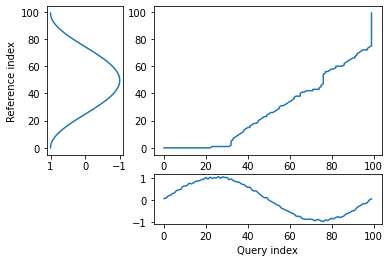

In [2]:
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

In [3]:
print(asymmetricP0)

Step pattern recursion:
 g[i,j] = min(
     g[i  ,j-1] + 0 * d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-1,j  ] +     d[i  ,j  ] ,
 ) 

Normalization hint: N



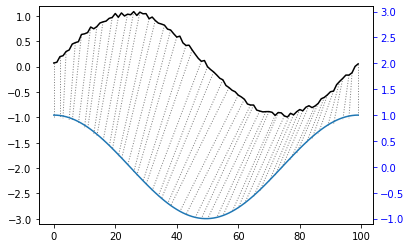

In [4]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



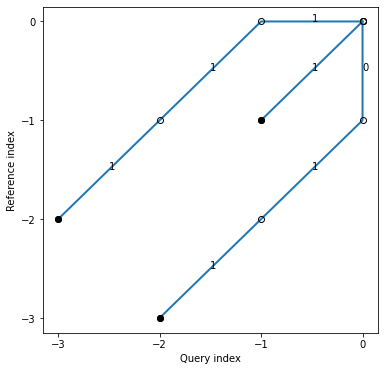

In [5]:
## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

## And much more!

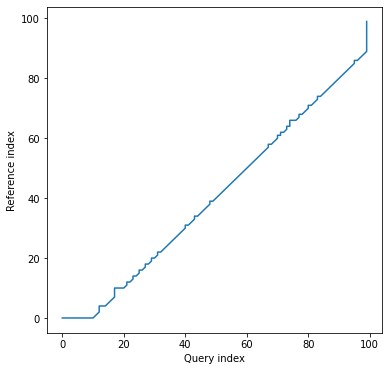

In [6]:
# Use a windowing restrain
alignment = dtw(query, template, keep_internals=True, 
    window_type="sakoechiba", window_args={'window_size': 10})\
    .plot()

In [7]:
# Stand-alone (shell) executable
!dtw 

usage: dtw [-h] [--step_pattern STEP_PATTERN] query reference

Command line DTW utility.

positional arguments:
  query                 Query timeseries (tsv)
  reference             Reference timeseries (tsv)

optional arguments:
  -h, --help            show this help message and exit
  --step_pattern STEP_PATTERN
                        Step pattern, aka recursion rule. E.g. symmetric2,
                        asymmetric, ...

The Python and R interfaces provide the full functionality, including plots.
See https://dynamictimewarping.github.io/


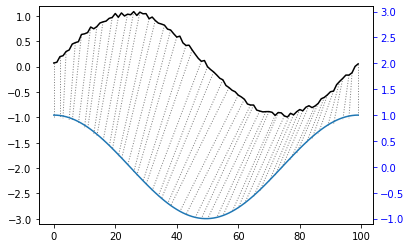

In [8]:
# OO method call chain
a=dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

# 4. Measuring and optimizing runtime
Python offers the timeit function.

In [10]:
%%timeit

for i in range(100000):
    i = i**3

10 loops, best of 3: 28.3 ms per loop


# 5. Adding visualizations to feature analysis

There are many possible approaches to using data viz to advance your analytical capabilities.

# 6. Improving target analysis with qcut
```python
amount_quintiles = pd.qcut(df.amount, q=5)
```

# 7. Using pandas-profiling for automated EDA
Use the panda-profiling toolkit to automate much of your exploratory data analysis. 

# 8. Finding good utility code
```python
df.groupby('lifeguard_team')['lives_saved'].apply(lambda x:x.rolling(center=False,window=2).mean())
```

# 9. Commenting according to PEP8 standards
```python
def persuasion():
   """Attempt to get point across."""
   print('Following this advice about writing proper Python comments will make you popular at parties')
```

# 10. Setting up a virtual environment
A virtual environment sets up an isolated workspace for your Python project. 